# Rappel de l'objectif

<span style="color:red">L'objectif est de répartir un budget donné sur un intervalle de temps donné.</span>


```Difficultés``` : 
- Ne pas épuiser le budget avant la fin de l'intervalle
- Ne pas avoir de vide de dépense durant l'intervalle
- Il ne doit pas rester de budget à la fin de l'intervalle

In [1]:
import simpy
import random

## 1. Simulation totalement manuelle (sans variables)

Le cadre est le suivant : 
- Une bid request toute les minutes pendant une heure
- On bid une valeur entre 0 et 10€
- Si on est au dessus de 5€ on gagne et on paye le bid, sinon on perd et on ne paye rien

In [2]:
time_between_br = 1

In [3]:
def bidding(env):
    budget = 100
    while True:
        print(f'Bid request at {env.now}')
        bid = random.random()
        bid = round(bid, 2)
        if bid > 0.5 and budget > 0:
            print("\t Win")
            print(f"\t Paid {bid*10}")
            budget = budget - bid*10 
        else:
            print("\t Lose")
            print("\t Paid 0")
        print(f'\t Remaining budget is {budget} \n')
        yield env.timeout(time_between_br)

In [4]:
env = simpy.Environment()

In [5]:
env.process(bidding(env))

<Process(bidding) object at 0x7f21882da4d0>

In [7]:
env.run(until=60)

Bid request at 0
	 Lose
	 Paid 0
	 Remaining budget is 100 

Bid request at 1
	 Win
	 Paid 9.8
	 Remaining budget is 90.2 

Bid request at 2
	 Lose
	 Paid 0
	 Remaining budget is 90.2 

Bid request at 3
	 Win
	 Paid 5.699999999999999
	 Remaining budget is 84.5 

Bid request at 4
	 Lose
	 Paid 0
	 Remaining budget is 84.5 

Bid request at 5
	 Win
	 Paid 6.5
	 Remaining budget is 78.0 

Bid request at 6
	 Lose
	 Paid 0
	 Remaining budget is 78.0 

Bid request at 7
	 Lose
	 Paid 0
	 Remaining budget is 78.0 

Bid request at 8
	 Lose
	 Paid 0
	 Remaining budget is 78.0 

Bid request at 9
	 Lose
	 Paid 0
	 Remaining budget is 78.0 

Bid request at 10
	 Win
	 Paid 6.0
	 Remaining budget is 72.0 

Bid request at 11
	 Win
	 Paid 7.4
	 Remaining budget is 64.6 

Bid request at 12
	 Lose
	 Paid 0
	 Remaining budget is 64.6 

Bid request at 13
	 Win
	 Paid 8.9
	 Remaining budget is 55.699999999999996 

Bid request at 14
	 Win
	 Paid 7.0
	 Remaining budget is 48.699999999999996 

Bid request at 15

On a ici simulé ce qui aurait pu se passer sur une heure donnée. Dans cette simulation le budget est dépensé beaucoup trop rapidement dans l'heure. L'objectif serait de simuler une situation dans laquelle le budget serait dépensé uniformément dans l'heure.

L'idée est la suivante : la probabilité de gagner dépend désormais du montant de la bid request. On estime le nombre de br qui va venir dans l'heure (dans notre cas l'estimation est exacte). Puis selon le budget total on attribue un budget par bid request. Si on gagne, alors tout se passe bien, si on perd alors l'idée et de faire augmenter la proba de gagner pour la prochaine bid request en ajoutant le budget non alloué de la bid request perdue à la prochaine. 

In [16]:
def win_proba(p):
    return random.random() < p

In [ ]:
time_between_br = 1

In [53]:
def bidding(env):
    total_budget = 60
    estimate_br = 60
    budget_per_br = total_budget/estimate_br
    proba = 0.5
    budget = total_budget
    while True:
        print(f'Bid request at {env.now}')
        bid = budget_per_br
        if win_proba(proba) and budget > 0:
            print("\t Win")
            print(f"\t Paid {bid}")
            budget = budget - bid
            budget_per_br = total_budget/estimate_br
            proba = 0.5
        else:
            print("\t Lose")
            print("\t Paid 0")
            budget_per_br += total_budget/estimate_br
            proba += 0.1
        print(f'\t Remaining budget is {budget} \n')
        yield env.timeout(time_between_br)

In [61]:
env = simpy.Environment()
env.process(bidding(env))
env.run(until=60)

Bid request at 0
	 Win
	 Paid 1.0
	 Remaining budget is 59.0 

Bid request at 1
	 Lose
	 Paid 0
	 Remaining budget is 59.0 

Bid request at 2
	 Win
	 Paid 2.0
	 Remaining budget is 57.0 

Bid request at 3
	 Lose
	 Paid 0
	 Remaining budget is 57.0 

Bid request at 4
	 Lose
	 Paid 0
	 Remaining budget is 57.0 

Bid request at 5
	 Lose
	 Paid 0
	 Remaining budget is 57.0 

Bid request at 6
	 Win
	 Paid 4.0
	 Remaining budget is 53.0 

Bid request at 7
	 Win
	 Paid 1.0
	 Remaining budget is 52.0 

Bid request at 8
	 Lose
	 Paid 0
	 Remaining budget is 52.0 

Bid request at 9
	 Win
	 Paid 2.0
	 Remaining budget is 50.0 

Bid request at 10
	 Win
	 Paid 1.0
	 Remaining budget is 49.0 

Bid request at 11
	 Win
	 Paid 1.0
	 Remaining budget is 48.0 

Bid request at 12
	 Win
	 Paid 1.0
	 Remaining budget is 47.0 

Bid request at 13
	 Win
	 Paid 1.0
	 Remaining budget is 46.0 

Bid request at 14
	 Win
	 Paid 1.0
	 Remaining budget is 45.0 

Bid request at 15
	 Lose
	 Paid 0
	 Remaining budget is

Now we can execute the previous simulation but store results in a list to make a visualization.

In [79]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def graph_bidding(env):
    total_budget = 3600
    estimate_br = 3600
    budget_per_br = total_budget/estimate_br
    proba = 0.5
    budget = total_budget
    while True:
        bid = budget_per_br
        if win_proba(proba) and budget > 0:
            budget = budget - bid
            budget_per_br = total_budget/estimate_br
            proba = 0.5
        else:
            budget_per_br += total_budget/estimate_br
            proba += 0.1
        res.append(budget)
        bid_res.append(bid)
        yield env.timeout(time_between_br)

In [17]:
res = []
bid_res = []
env = simpy.Environment()
env.process(graph_bidding(env))
env.run(until=3600)

<IPython.core.display.Javascript object>


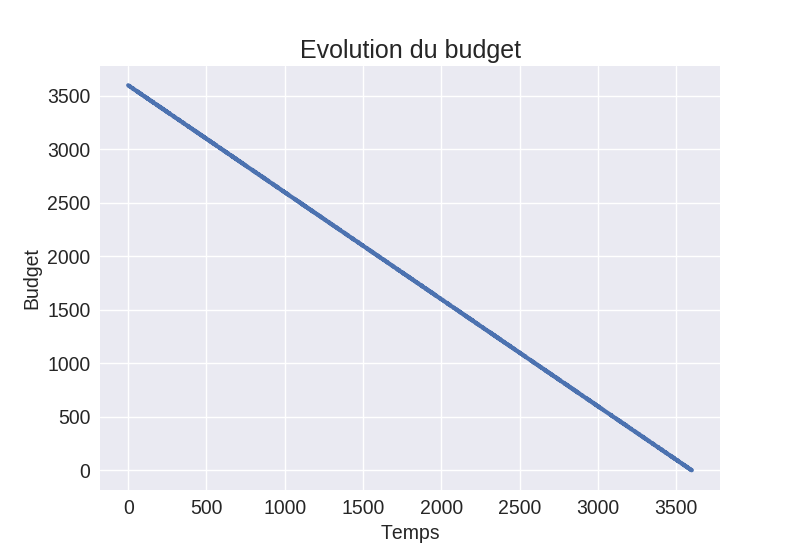

In [28]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(res, linewidth=3)
# Set chart title and label axes.
ax.set_title("Evolution du budget", fontsize=18)
ax.set_xlabel("Temps", fontsize=14)
ax.set_ylabel("Budget", fontsize=14)
# Set size of tick labels.
ax.tick_params(axis='both', labelsize=14)
plt.show()

<IPython.core.display.Javascript object>


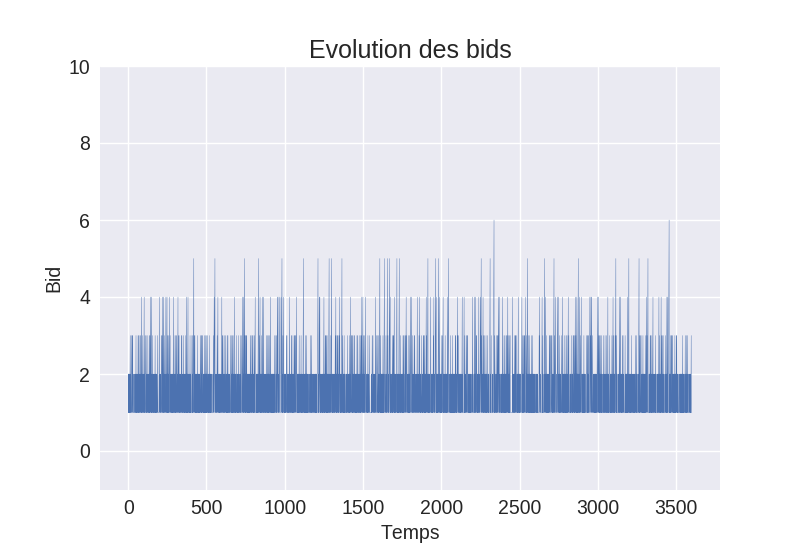

In [103]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(bid_res, linewidth=0.3)
# Set chart title and label axes.
ax.set_title("Evolution des bids", fontsize=18)
ax.set_xlabel("Temps", fontsize=14)
ax.set_ylabel("Bid", fontsize=14)
# Set size of tick labels.
ax.tick_params(axis='both', labelsize=14)
plt.ylim((-1,10))
plt.show()

## 2. Ajout de widgets pour voir comment évolue la simulation selon les paramètres

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
time_between_br = 1

In [3]:
def win_proba(p):
    return random.random() < p

In [9]:
def graph_bidding(proba_value, budget_value, estimate_br_value):
    total_budget = budget_value
    estimate_br = estimate_br_value
    budget_per_br = round(total_budget/estimate_br,2)
    proba = proba_value
    budget = total_budget
    res = []
    bid_res = []
    for i in range(estimate_br):
        bid = budget_per_br
        if win_proba(proba) and budget > 0:
            budget = budget - bid
            budget_per_br = round(total_budget/estimate_br,2)
            proba = proba_value
        else:
            budget_per_br += round(total_budget/estimate_br,2)
            proba += 0.1
        res.append(budget)
        bid_res.append(bid)
    return bid_res

In [11]:
def plot_bids(b_values):
    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(b_values, linewidth=1)
    # Set chart title and label axes.
    ax.set_title("Evolution des bids", fontsize=18)
    ax.set_xlabel("Temps", fontsize=14)
    ax.set_ylabel("Bid", fontsize=14)
    # Set size of tick labels.
    ax.tick_params(axis='both', labelsize=14)
    #plt.ylim((-1,10))
    plt.show()

In [14]:
proba_slider = widgets.FloatSlider(
    min=0,
    max=1,
    step=0.1,
    description='Win proba:',
    value=0.5
)
budget_slider = widgets.IntSlider(
    min=0,
    max=200,
    step=1,
    description='Budget:',
    value=100
)
br_slider = widgets.IntSlider(
    min=0,
    max=5000,
    step=10,
    description='Br:',
    value=100
)
button = widgets.Button(
    description="Update plot"
)
output = widgets.Output()

def on_b_click(b):
    output.clear_output()
    with output:
        bid_res = graph_bidding(proba_slider.value, budget_slider.value, br_slider.value)
        plot_bids(bid_res)
        
button.on_click(on_b_click)
display(proba_slider)
display(budget_slider)
display(br_slider)
display(button)
display(output)

FloatSlider(value=0.5, description='Win proba:', max=1.0)

IntSlider(value=100, description='Budget:', max=200)

IntSlider(value=100, description='Br:', max=5000, step=10)

Button(description='Update plot', style=ButtonStyle())

Output()

## 3. Idées de futurs algos

Actuellement le modèle fonctionne sur le principe suivant :
pour répartir convenablement le budget d'une heure par exemple on estime le nombre de br, on peut donc calculer un budget par br et on alloue ce budget par br à chaque br reçue en reportant ce budget sur les futures br à chaque défaite.

On pourrait imaginer une amélioration de ce principe naïf en imaginant faire une classification sur les br avant de voir s'il y a des clusters de br "plus efficaces" qui se dégagent pour une campagne donnée. Ainsi on pourrait allouer un budget par br variable en fonction du cluster de la br reçue -> mettre plus de budget sur les br "plus efficaces". Lorsqu'il y aurait une défaite on pourrait reporter le budget de la br perdue sur la prochaine br "efficace".

Se baser sur l'article *Real Time Bid Optimization with Smooth Budget Delivery in Online Advertising* et mettre en place une sorte d'optimisation sous contrainte avec les données existantes (Max le CTR sous la contrainte de budget horaire ou quotidienne par exemple).  